# Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Изучение данных из файла

Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.info()
df_internet.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.info()
df_messages.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
df_tarrifs = pd.read_csv('/datasets/tariffs.csv')
df_tarrifs.info()
df_tarrifs['mb_per_month_included'] = df_tarrifs['mb_per_month_included'] / 1024 
df_tarrifs = df_tarrifs.rename(columns={'mb_per_month_included':'gb_per_month_included', 'tariff_name':'tariff'})
df_tarrifs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [6]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.info()
df_users.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод

Название столбцов в таблицах записаны в верном формате. Тип данных дат записан в формате object. В файле с тарифом поменял название столбца 'tariff_name ' на  'tariff'

# Подготовка данных

Шаг 2. Подготовьте данные
Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [7]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d %H:%M')
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['duration'] = df_calls['duration'].apply(math.ceil)
df_calls = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum']).reset_index()
df_calls.columns = ['user_id', 'month', 'count_minut', 'sum_minut']
df_calls.head(5)
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      3174 non-null   int64
 1   month        3174 non-null   int64
 2   count_minut  3174 non-null   int64
 3   sum_minut    3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


Исправил тип данных даты на datetime64. Время разговора округлил до полных минут, согласно тарифу. Сделал сводную таблицу по user_id и месяцу. Посчитал количество звонков и минут разговора. Исправил название столбцов.

In [8]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d %H:%M')
df_messages['month'] = df_messages['message_date'].dt.month
df_messages = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
df_messages.columns = ['user_id', 'month', 'count_messages']

df_messages.head(5)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2717 non-null   int64
 1   month           2717 non-null   int64
 2   count_messages  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


Исправил тип данных даты на datetime64. Подсчитал количество сообщений по месяцам. Сделал сводную таблицу по user_id и месяцу.  Исправил название столбцов.

In [9]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d %H:%M')
df_internet['month'] = df_internet['session_date'].dt.month
df_internet = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
df_internet['mb_used'] = (df_internet['mb_used'] / 1024).apply(math.ceil)
df_internet.columns = ['user_id', 'month', 'gb_used']

df_internet.head(5)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  3203 non-null   int64
 1   month    3203 non-null   int64
 2   gb_used  3203 non-null   int64
dtypes: int64(3)
memory usage: 75.2 KB


Исправил тип данных даты на datetime64. Объем интернет-траффика округлил до полного гигабайта, согласно тарифу. Сделал сводную таблицу по user_id и месяцу.

In [10]:
df = df_calls.merge(df_messages, on=['user_id', 'month'], how='outer')
df = df.merge(df_internet, on=['user_id', 'month'], how='outer')
#df = df_internet.merge(df_calls, on=['user_id', 'month'], how='left')
#df = df.merge(df_messages, on=['user_id', 'month'], how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   count_minut     3174 non-null   float64
 3   sum_minut       3174 non-null   float64
 4   count_messages  2717 non-null   float64
 5   gb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [11]:
df = df.merge(df_users, on='user_id', how='left')
df.head(5)

,user_id,month,count_minut,sum_minut,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Объединил таблицы в одну df

In [12]:
df = df.merge(df_tarrifs, on='tariff', how='left')
df.head(5)

,user_id,month,count_minut,sum_minut,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1


Все файлы объединил в одну таблицу с тарифом и условия по нему.

In [13]:
display(df.isna().sum())
df['count_messages'] = df['count_messages'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['count_minut'] = df['count_minut'].fillna(0)
df['sum_minut'] = df['sum_minut'].fillna(0)
df.isna().sum()

user_id                     0
month                       0
count_minut                40
sum_minut                  40
count_messages            497
gb_used                    11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

user_id                     0
month                       0
count_minut                 0
sum_minut                   0
count_messages              0
gb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

После объединения проверил нужные столбцы на пропущенные значения. В столбцах интернета и сообщений вместо пропущенных значений поставил 0, так как думаю клиент не пользовался данной услугой.

In [14]:
def total(row):
    minute = (row['sum_minut'] - row['minutes_included']) * row['rub_per_minute']
    if minute < 0:
        minute = 0
    sms = (row['count_messages'] - row['messages_included']) * row['rub_per_message']
    if sms < 0:
        sms = 0
    gb = (row['gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    if gb < 0:
        gb = 0

    total = minute + sms + gb + row['rub_monthly_fee']
    return total

In [15]:
df['total'] = df.apply(total, axis=1)
df.head(5)

,user_id,month,count_minut,sum_minut,count_messages,gb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total
0,1000,5,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0


Посчитал прибыль каждого месяца для каждого клиента

### Вывод

Привел даты к типу datetime64. Минуты каждого разговора округлил до полных минут согласно тарифам. 

Объем интернета пересчитал в GB и округлил. 

Посчитал для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

Посчитал помесячную выручку с каждого пользователя.

# Анализ данных

Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение.

Постройте гистограммы. Опишите распределения.

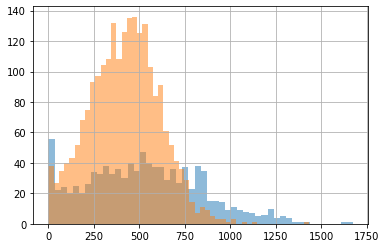

In [16]:
df_ultra = df[df['tariff'] == 'ultra']
df_smart = df[df['tariff'] == 'smart']
df_ultra['sum_minut'].hist(bins=50, alpha=0.5);
df_smart['sum_minut'].hist(bins=50, alpha=0.5);


В обоих тарифах в среднем клиенты тратят около 500 минут в месяц

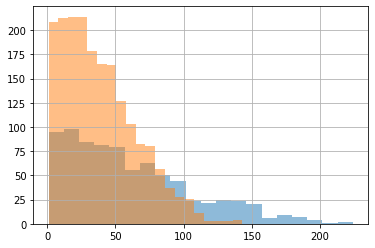

In [17]:
df_ultra = df_ultra.query('count_messages > 0')
df_smart = df_smart.query('count_messages > 0')
df_ultra['count_messages'].hist(bins=20, alpha=0.5);
df_smart['count_messages'].hist(bins=20, alpha=0.5);

Так как в первой части заменял пропуски в сообщениях на 0, то в этой гистограмме исключил эти данные. 

В обоих тарифах сообщения в среднем отправляют до 50 шт.

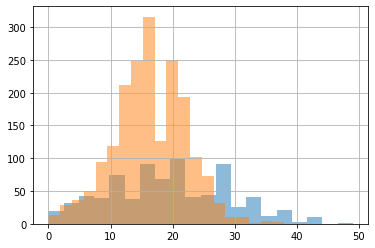

In [18]:
df_ultra['gb_used'].hist(bins=20, alpha=0.5);
df_smart['gb_used'].hist(bins=20, alpha=0.5);

В среднем в тарифах расходуют от 10 до 23 Гб интернета

In [19]:
df_min = df.pivot_table(index='tariff', values='sum_minut', aggfunc=['mean', 'var', 'std'])
df_min

,mean,var,std
,sum_minut,sum_minut,sum_minut
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


В тарифе Ультра клиенты в среднем больше тратят минут

In [20]:
df_mes = df.pivot_table(index='tariff', values='count_messages', aggfunc=['mean', 'var', 'std'])
df_mes

,mean,var,std
,count_messages,count_messages,count_messages
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


В тарифе Ультра клиенты чаще отправляют сообщения

In [21]:
df_gb = df.pivot_table(index='tariff', values='gb_used', aggfunc=['mean', 'var', 'std'])
df_gb

,mean,var,std
,gb_used,gb_used,gb_used
tariff,,,
smart,16.328847,33.028705,5.747061
ultra,19.494416,97.091686,9.853511


В тарифе Ультра клиенты в среднем больше расходуют интернета

### Вывод

Провел анализ сколько требуется минут, сообщений и интернета пользователям двух тарифов в месяц. 

Клиенты тарифа Ультра тратять больше услуг.

# Проверка гипотез

Шаг 4. Проверьте гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.

Проверим гипотезу

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны

In [22]:
print('cредняя выручка тарифа Ультра: ',df_ultra['total'].mean())
print('cреднее выручка тарифа Смарт: ',df_smart['total'].mean())

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_ultra['total'], 
    df_smart['total'], 
    equal_var = False)
# так как выборки по тарифам разные, то и дисперсия разная. Буду использовать equal_var = False
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя выручка тарифа Ультра:  2047.7358490566037
cреднее выручка тарифа Смарт:  1289.2289281997919
p-значение:  4.4011742211120964e-215
Отвергаем нулевую гипотезу


После проверки была отвергнута нулева гипотеза. 

Вывод: Выручка двух тарифов между собой отличается.

Проверим гипотезу

Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна выручки пользователей из других регионов

In [23]:
df_moscow =df[df['city'] == 'Москва']
df_region = df[df['city'] != 'Москва']

In [24]:
print('cредняя выручка в Москве: ',df_moscow['total'].mean())
print('cреднее выручка в регионе: ',df_region['total'].mean())

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    df_moscow['total'], 
    df_region['total'], 
    equal_var = False)
# так как выборки разные, то и дисперсия разная. Буду использовать equal_var = False
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя выручка в Москве:  1546.7135842880523
cреднее выручка в регионе:  1524.9362274298885
p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


После проверки, нулевая гипотеза не была опровергнута.

Вывод: средняя выручка пользователей из Москвы практически равна выручке пользователей из других регионов.

### Вывод

Построил гистограммы использования минут, сообщений и интернета по двум тарифам. Показатели потребления в тарифе Ультра больше.

Проверил гипотезу о равенстве средней выручки тарифов. Гипотеза была отвергнута, выручка по тарифам различается.

Проверил гипотезу о равенстве средней выручки в Москве и регионах. Гипотеза была подтверждена, средние выручки практически одинаковые.

# Общий вывод

Провел анализ тарифов для телеком-компании.

Посчитал количество использованных минут, сообщений и интернет-трафика для каждого пользователя по месяцам и прибыль с каждого клиента компании.

По построенным гистограммам было определено, что клиенты с тарифом ь тратят больше минут, сообщений и интернет-трафика.

Проверил гипотезу о равенстве прибыли по тарифам. В результате исследования оказалось, что клиенты с тарифом Ультра приносят больше прибыли. 

Проверил гипотезу о равенстве прибыли клиентов из Москвы по сравнению с регионами. В результате исследования оказалось, что прибыль практически одинаковая. 